I'll try to run anokas clustering script from kaggle

## Imports and Functions

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import glob
from sklearn import cluster
from scipy.misc import imread
import cv2
import skimage.measure as sm
# import progressbar
import multiprocessing
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
new_style = {'grid': False}
plt.rc('axes', **new_style)
''
# Function to show 4 images
def show_four(imgs, title):
    #select_imgs = [np.random.choice(imgs) for _ in range(4)]
    select_imgs = [imgs[np.random.choice(len(imgs))] for _ in range(4)]
    _, ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(20, 3))
    plt.suptitle(title, size=20)
    for i, img in enumerate(select_imgs):
        ax[i].imshow(img)

# Function to show 8 images
def show_eight(imgs, title):
    select_imgs = [imgs[np.random.choice(len(imgs))] for _ in range(8)]
    _, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(20, 6))
    plt.suptitle(title, size=20)
    for i, img in enumerate(select_imgs):
        ax[i // 4, i % 4].imshow(img)

In [8]:
cd /mnt/vidme/vid1/persons/

/mnt/vidme/vid1/persons


In [14]:
select = 500 # Only load 500 images for speed
# Data loading
train_files = sorted(glob.glob('*.*'), key=lambda x: random.random())[:select]
train = np.array([imread(img) for img in train_files])
print('Length of train {}'.format(len(train)))

Length of train 500


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


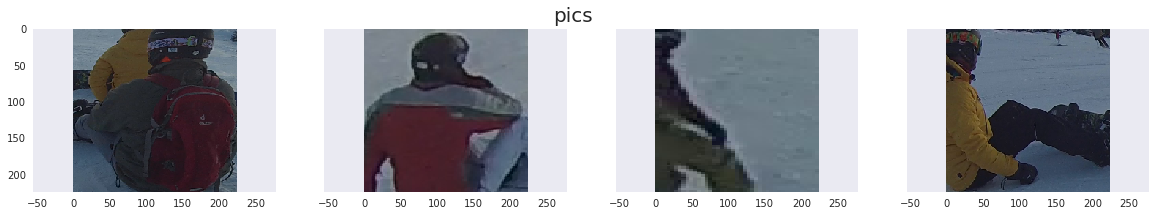

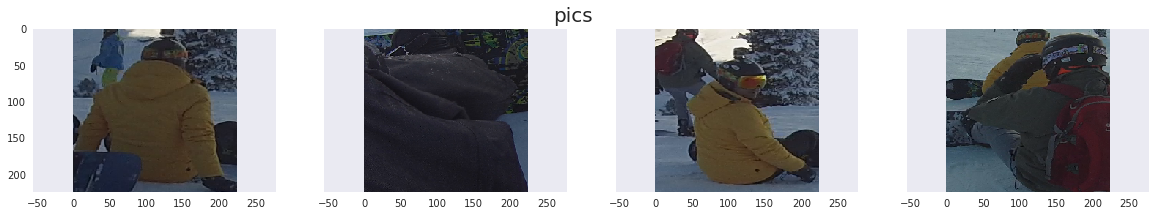

In [17]:
for uniq in pd.Series(shapes).unique():
    for i in range(2):
        show_four(train, 'pics')
        plt.show()

## Work

In [19]:

# Function for computing distance between images
def compare(args):
    img, img2 = args
    img = (img - img.mean()) / img.std()
    img2 = (img2 - img2.mean()) / img2.std()
    return np.mean(np.abs(img - img2))

# Resize the images to speed it up.
#train = [cv2.resize(img, (224, 224), cv2.INTER_LINEAR) for img in train]

# Create the distance matrix in a multithreaded fashion
pool = multiprocessing.Pool(12)
#bar = progressbar.ProgressBar(max=len(train))
distances = np.zeros((len(train), len(train)))
for i, img in tqdm(enumerate(train)): #enumerate(bar(train)):
    all_imgs = [(img, f) for f in train]
    dists = pool.map(compare, all_imgs)
    distances[i, :] = dists

500it [02:44,  3.15it/s]


In [39]:
cls = cluster.DBSCAN(metric='precomputed', min_samples=5, eps=0.623)
y = cls.fit_predict(distances)
print(y)
print('Cluster sizes:')
print(pd.Series(y).value_counts())

[ 2  1  0  0 -1 -1 -1 -1  0  0  1  0  0 -1  0  0 -1  0 -1  0 -1 -1 -1  1  0
 -1 -1  1 -1  0 -1 -1 -1 -1 -1  0  0 -1  0 -1  3 -1  0  0  0  0 -1  0  0 -1
 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1  0  0 -1 -1  0
  0 -1 -1  0  0 -1 -1 -1 -1 -1  1 -1  0  0 -1  1 -1 -1 -1 -1  0 -1 -1  0 -1
  0 -1 -1  0  0  0  0  0 -1 -1 -1 -1  0  0 -1  0  1 -1 -1  0 -1 -1 -1  0  0
  0 -1  0 -1  0  0  0  0 -1 -1 -1  0  0  2 -1  0  0  0  0 -1  0 -1  0  0  0
 -1 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0  0 -1  0 -1  2 -1 -1  0  0
  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1  0  0
  0 -1 -1  0 -1 -1 -1  0 -1  0 -1 -1  0  0 -1  0  2  0  0  0  0 -1 -1 -1 -1
  0  0 -1  0  0 -1 -1  0  2  0 -1  3 -1  0  0  0 -1  0  0  0 -1  0  0  0 -1
 -1  0  0 -1  0  0  0  0 -1  0  0  0  1 -1  0 -1 -1 -1  0 -1  0 -1 -1  0  0
  0  0 -1  0 -1 -1  0 -1  0  1 -1 -1  0  0 -1 -1 -1  2 -1 -1  0 -1 -1 -1  0
 -1  0  0  0  0 -1  0 -1  0 -1 -1 -1  3 -1  0  0 -1  0  0 -1 -1 -1 -1 -1  1
  0  3  0  0

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


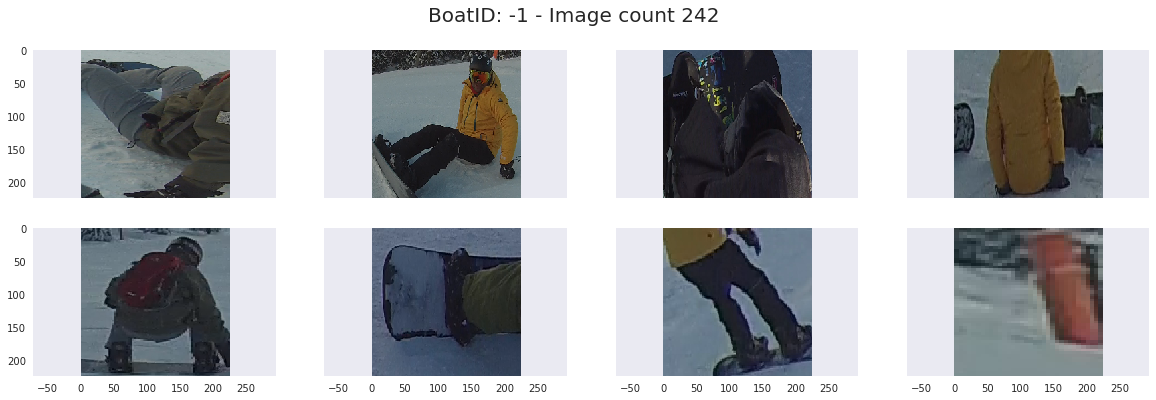

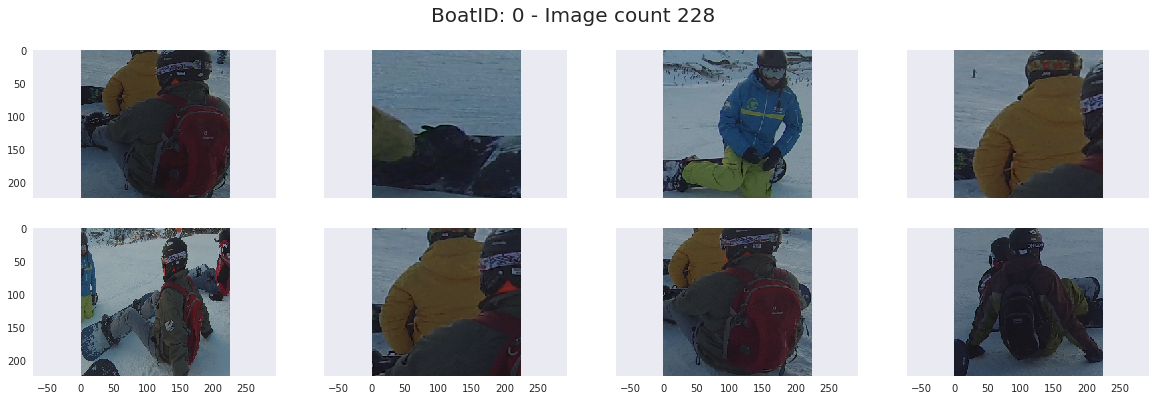

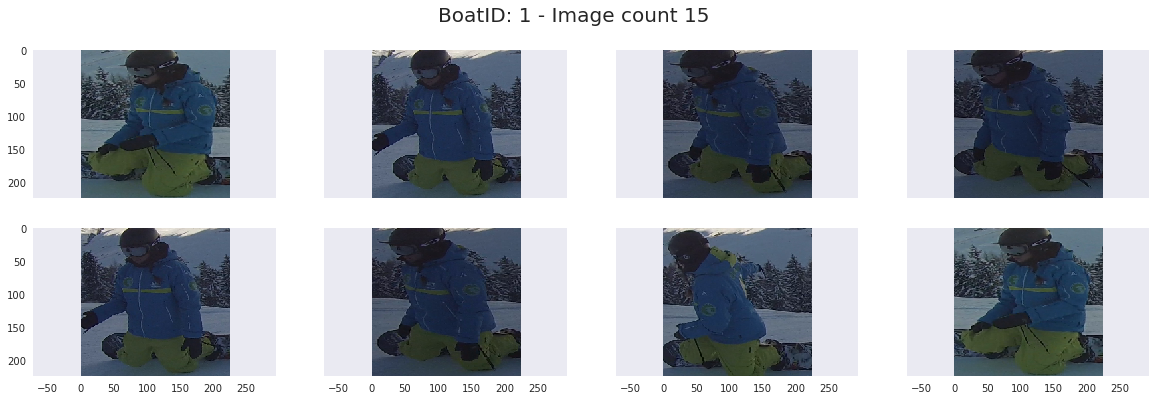

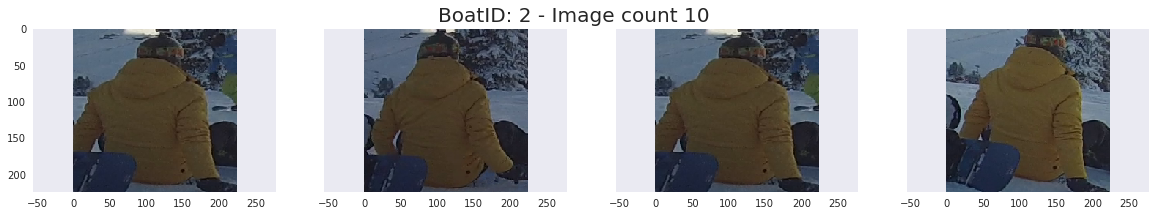

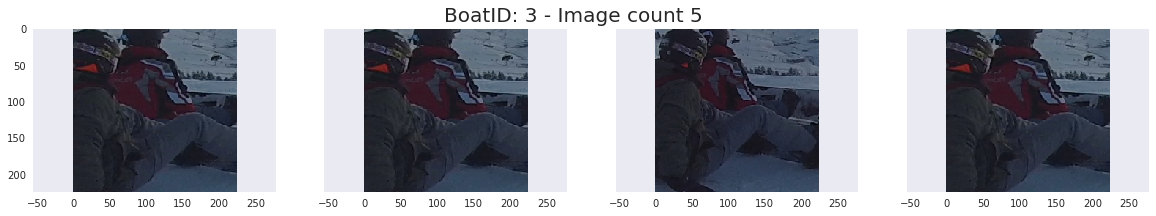

In [42]:
for uniq in pd.Series(y).value_counts().index:
    size = len(np.array(train)[y == uniq])
    if size > 10:
        show_eight(np.array(train)[y == uniq], 'BoatID: {} - Image count {}'.format(uniq, size))
        plt.show()
    else:
        show_four(np.array(train)[y == uniq], 'BoatID: {} - Image count {}'.format(uniq, size))
        plt.show()